In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
print(tf.__version__)
print(tf.test.is_gpu_available())


2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


## Data

(60000, 28, 28)
(6131, 28, 28)


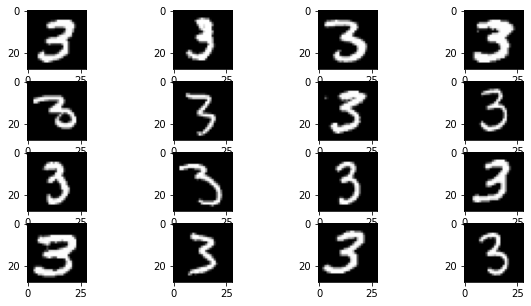

In [2]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
print(train_images.shape)


learn_label = 3
train_images = train_images[train_labels==learn_label]
print(train_images.shape)


fig = plt.figure(figsize=(10,5))
for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(train_images[i],cmap='gray')
plt.show()

### normalize data [-1,1]

In [3]:
train_images = (train_images-127.5)/127.5

## noise

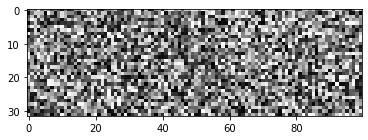

In [4]:
def create_noise(batch_size, noise_dim):
    return np.random.uniform(low=-1, high=1, size=(batch_size, noise_dim))
#     return np.random.normal(size=(batch_size, noise_dim))

noise = create_noise(32,100)
plt.imshow(noise,cmap= 'gray')
plt.show()

# Model

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, ReLU

In [6]:
class Generator(tf.keras.Model):
    def __init__(self):
        super(Generator, self).__init__()
  
        self.d1 = Dense(256)
        self.re1 = ReLU()
        
        self.d2 = Dense(28*28)

    def call(self, x):
        x = self.d1(x)
        x = self.re1(x)
        x = self.d2(x)
        return x

class Discriminator(tf.keras.Model):
    def __init__(self):
        super(Discriminator,self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(256)
        self.dr1 = Dropout(0.5)
        self.re1 = ReLU()
        
        self.d2 = Dense(128)
        self.dr2 = Dropout(0.5)
        self.re2 = ReLU()
        
        self.d3 = Dense(1, activation = 'sigmoid')
        
    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        x = self.dr1(x)
        x = self.re1(x)
        x = self.d2(x)
        x = self.dr2(x)
        x = self.re2(x)
        x = self.d3(x)
        return x
        

## Loss

In [7]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def D_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def G_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

## Optimizer

논문에서 momentum을 사용하였다고 하여, momentum을 그대로 사용

In [8]:
LEARNING_RATE = 1e-3
MOMENTUM = 0.9
G_optimizer = tf.keras.optimizers.SGD(learning_rate =LEARNING_RATE,
                                     momentum = MOMENTUM)

D_optimizer = tf.keras.optimizers.SGD(learning_rate =LEARNING_RATE,
                                     momentum = MOMENTUM)

## Train_step

In [9]:
@tf.function
def train_step(images):
    noise = create_noise(BATCH_SIZE, NOISE_DIM)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = G(noise, training=True)

        real_output = D(images, training=True)
        fake_output = D(generated_images, training=True)

        g_loss = G_loss(fake_output)
        d_loss = D_loss(real_output, fake_output)

    g_grad = gen_tape.gradient(g_loss, G.trainable_variables)
    d_grad = disc_tape.gradient(d_loss, D.trainable_variables)

    G_optimizer.apply_gradients(zip(g_grad, G.trainable_variables))
    D_optimizer.apply_gradients(zip(d_grad, D.trainable_variables))
    
    return g_loss, d_loss

## Train


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

0 done tf.Tensor

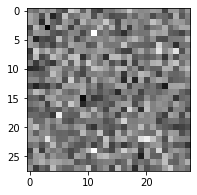

10 done tf.Tensor(1.0798022, shape=(), dtype=float32) tf.Tensor(0.637528, shape=(), dtype=float32)
20 done tf.Tensor(1.0490941, shape=(), dtype=float32) tf.Tensor(0.6656048, shape=(), dtype=float32)
30 done tf.Tensor(1.0339873, shape=(), dtype=float32) tf.Tensor(0.6778967, shape=(), dtype=float32)
40 done tf.Tensor(1.0472711, shape=(), dtype=float32) tf.Tensor(0.6723414, shape=(), dtype=float32)
50 done tf.Tensor(1.0667511, shape=(), dtype=float32) tf.Tensor(0.6673786, shape=(), dtype=float32)
60 done tf.Tensor(1.0765475, shape=(), dtype=float32) tf.Tensor(0.66579777, shape=(), dtype=float32)
70 done tf.Tensor(1.0524638, shape=(), dtype=float32) tf.Tensor(0.6761912, shape=(), dtype=float32)
80 done tf.Tensor(1.0364443, shape=(), dtype=float32) tf.Tensor(0.6813169, shape=(), dtype=float32)
90 done tf.Tensor(1.0318542, shape=(), dtype=float32) tf.Tensor(0.68321735, shape=(), dtype=float32)
100 done tf.Tensor(1.0254571, shape=(), dtype=float32) tf.Tensor(0.68567395, shape=(), dtype=float3

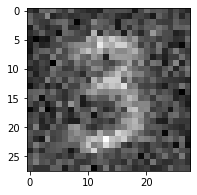

110 done tf.Tensor(1.0239576, shape=(), dtype=float32) tf.Tensor(0.6863702, shape=(), dtype=float32)
120 done tf.Tensor(1.0245064, shape=(), dtype=float32) tf.Tensor(0.68689054, shape=(), dtype=float32)
130 done tf.Tensor(1.0244472, shape=(), dtype=float32) tf.Tensor(0.68706423, shape=(), dtype=float32)
140 done tf.Tensor(1.0229423, shape=(), dtype=float32) tf.Tensor(0.687736, shape=(), dtype=float32)
150 done tf.Tensor(1.0211505, shape=(), dtype=float32) tf.Tensor(0.6885586, shape=(), dtype=float32)
160 done tf.Tensor(1.0207869, shape=(), dtype=float32) tf.Tensor(0.688674, shape=(), dtype=float32)
170 done tf.Tensor(1.0211747, shape=(), dtype=float32) tf.Tensor(0.68879604, shape=(), dtype=float32)
180 done tf.Tensor(1.0232455, shape=(), dtype=float32) tf.Tensor(0.6882151, shape=(), dtype=float32)
190 done tf.Tensor(1.0233752, shape=(), dtype=float32) tf.Tensor(0.6882782, shape=(), dtype=float32)
200 done tf.Tensor(1.0240402, shape=(), dtype=float32) tf.Tensor(0.6881111, shape=(), dtyp

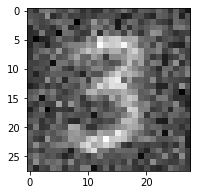

210 done tf.Tensor(1.0251057, shape=(), dtype=float32) tf.Tensor(0.68795496, shape=(), dtype=float32)
220 done tf.Tensor(1.0247408, shape=(), dtype=float32) tf.Tensor(0.6880872, shape=(), dtype=float32)
230 done tf.Tensor(1.0277084, shape=(), dtype=float32) tf.Tensor(0.68743867, shape=(), dtype=float32)
240 done tf.Tensor(1.0268465, shape=(), dtype=float32) tf.Tensor(0.68767875, shape=(), dtype=float32)
250 done tf.Tensor(1.0271741, shape=(), dtype=float32) tf.Tensor(0.6874213, shape=(), dtype=float32)
260 done tf.Tensor(1.0302136, shape=(), dtype=float32) tf.Tensor(0.68716854, shape=(), dtype=float32)
270 done tf.Tensor(1.0322422, shape=(), dtype=float32) tf.Tensor(0.68627447, shape=(), dtype=float32)
280 done tf.Tensor(1.0340668, shape=(), dtype=float32) tf.Tensor(0.6862528, shape=(), dtype=float32)
290 done tf.Tensor(1.033936, shape=(), dtype=float32) tf.Tensor(0.6859755, shape=(), dtype=float32)
300 done tf.Tensor(1.0369254, shape=(), dtype=float32) tf.Tensor(0.68570656, shape=(), 

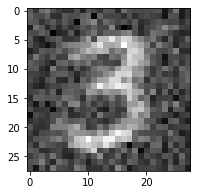

310 done tf.Tensor(1.0361226, shape=(), dtype=float32) tf.Tensor(0.6852428, shape=(), dtype=float32)
320 done tf.Tensor(1.0343828, shape=(), dtype=float32) tf.Tensor(0.6862309, shape=(), dtype=float32)
330 done tf.Tensor(1.0338044, shape=(), dtype=float32) tf.Tensor(0.6857191, shape=(), dtype=float32)
340 done tf.Tensor(1.0327346, shape=(), dtype=float32) tf.Tensor(0.6864166, shape=(), dtype=float32)
350 done tf.Tensor(1.0320084, shape=(), dtype=float32) tf.Tensor(0.68635356, shape=(), dtype=float32)
360 done tf.Tensor(1.032122, shape=(), dtype=float32) tf.Tensor(0.686302, shape=(), dtype=float32)
370 done tf.Tensor(1.0322537, shape=(), dtype=float32) tf.Tensor(0.68675274, shape=(), dtype=float32)
380 done tf.Tensor(1.029629, shape=(), dtype=float32) tf.Tensor(0.6868933, shape=(), dtype=float32)
390 done tf.Tensor(1.0321137, shape=(), dtype=float32) tf.Tensor(0.6862728, shape=(), dtype=float32)
400 done tf.Tensor(1.0333678, shape=(), dtype=float32) tf.Tensor(0.68646055, shape=(), dtype

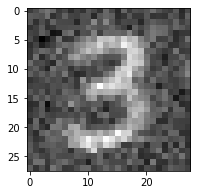

410 done tf.Tensor(1.0353931, shape=(), dtype=float32) tf.Tensor(0.6861031, shape=(), dtype=float32)
420 done tf.Tensor(1.033531, shape=(), dtype=float32) tf.Tensor(0.68651766, shape=(), dtype=float32)
430 done tf.Tensor(1.0316454, shape=(), dtype=float32) tf.Tensor(0.687022, shape=(), dtype=float32)
440 done tf.Tensor(1.0372522, shape=(), dtype=float32) tf.Tensor(0.6858176, shape=(), dtype=float32)
450 done tf.Tensor(1.0340644, shape=(), dtype=float32) tf.Tensor(0.68679655, shape=(), dtype=float32)
460 done tf.Tensor(1.0374686, shape=(), dtype=float32) tf.Tensor(0.6860212, shape=(), dtype=float32)
470 done tf.Tensor(1.0398662, shape=(), dtype=float32) tf.Tensor(0.6858775, shape=(), dtype=float32)
480 done tf.Tensor(1.0395783, shape=(), dtype=float32) tf.Tensor(0.68580073, shape=(), dtype=float32)
490 done tf.Tensor(1.0426778, shape=(), dtype=float32) tf.Tensor(0.6850147, shape=(), dtype=float32)
500 done tf.Tensor(1.0402706, shape=(), dtype=float32) tf.Tensor(0.68506455, shape=(), dty

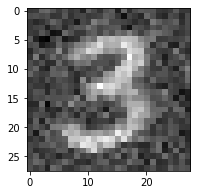

510 done tf.Tensor(1.0490674, shape=(), dtype=float32) tf.Tensor(0.68343323, shape=(), dtype=float32)
520 done tf.Tensor(1.0387902, shape=(), dtype=float32) tf.Tensor(0.6850051, shape=(), dtype=float32)
530 done tf.Tensor(1.0522871, shape=(), dtype=float32) tf.Tensor(0.68202657, shape=(), dtype=float32)
540 done tf.Tensor(1.0418181, shape=(), dtype=float32) tf.Tensor(0.6840501, shape=(), dtype=float32)
550 done tf.Tensor(1.0567744, shape=(), dtype=float32) tf.Tensor(0.68040854, shape=(), dtype=float32)
560 done tf.Tensor(1.0405257, shape=(), dtype=float32) tf.Tensor(0.68441075, shape=(), dtype=float32)
570 done tf.Tensor(1.0581316, shape=(), dtype=float32) tf.Tensor(0.6796595, shape=(), dtype=float32)
580 done tf.Tensor(1.0423403, shape=(), dtype=float32) tf.Tensor(0.68316007, shape=(), dtype=float32)
590 done tf.Tensor(1.0618358, shape=(), dtype=float32) tf.Tensor(0.67757595, shape=(), dtype=float32)
600 done tf.Tensor(1.0473588, shape=(), dtype=float32) tf.Tensor(0.6822875, shape=(),

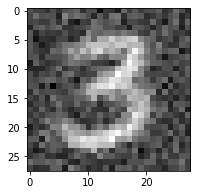

610 done tf.Tensor(1.065474, shape=(), dtype=float32) tf.Tensor(0.67590094, shape=(), dtype=float32)
620 done tf.Tensor(1.0520648, shape=(), dtype=float32) tf.Tensor(0.67999226, shape=(), dtype=float32)
630 done tf.Tensor(1.0623083, shape=(), dtype=float32) tf.Tensor(0.6777304, shape=(), dtype=float32)
640 done tf.Tensor(1.0565336, shape=(), dtype=float32) tf.Tensor(0.6789865, shape=(), dtype=float32)
650 done tf.Tensor(1.062038, shape=(), dtype=float32) tf.Tensor(0.67790145, shape=(), dtype=float32)
660 done tf.Tensor(1.0656023, shape=(), dtype=float32) tf.Tensor(0.67815924, shape=(), dtype=float32)
670 done tf.Tensor(1.0572252, shape=(), dtype=float32) tf.Tensor(0.67922735, shape=(), dtype=float32)
680 done tf.Tensor(1.0625274, shape=(), dtype=float32) tf.Tensor(0.67755747, shape=(), dtype=float32)
690 done tf.Tensor(1.0578045, shape=(), dtype=float32) tf.Tensor(0.67913705, shape=(), dtype=float32)
700 done tf.Tensor(1.060498, shape=(), dtype=float32) tf.Tensor(0.6768944, shape=(), d

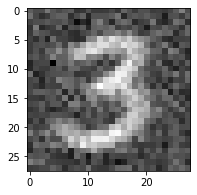

710 done tf.Tensor(1.0665554, shape=(), dtype=float32) tf.Tensor(0.67589176, shape=(), dtype=float32)
720 done tf.Tensor(1.0580441, shape=(), dtype=float32) tf.Tensor(0.6783253, shape=(), dtype=float32)
730 done tf.Tensor(1.0711486, shape=(), dtype=float32) tf.Tensor(0.67284465, shape=(), dtype=float32)
740 done tf.Tensor(1.0662881, shape=(), dtype=float32) tf.Tensor(0.6761493, shape=(), dtype=float32)
750 done tf.Tensor(1.0743308, shape=(), dtype=float32) tf.Tensor(0.6720307, shape=(), dtype=float32)
760 done tf.Tensor(1.0690815, shape=(), dtype=float32) tf.Tensor(0.6753078, shape=(), dtype=float32)
770 done tf.Tensor(1.0657887, shape=(), dtype=float32) tf.Tensor(0.6748905, shape=(), dtype=float32)
780 done tf.Tensor(1.064015, shape=(), dtype=float32) tf.Tensor(0.6747192, shape=(), dtype=float32)
790 done tf.Tensor(1.0694389, shape=(), dtype=float32) tf.Tensor(0.6709029, shape=(), dtype=float32)
800 done tf.Tensor(1.0592724, shape=(), dtype=float32) tf.Tensor(0.6766892, shape=(), dtyp

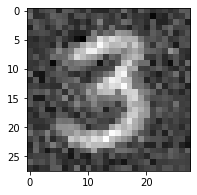

810 done tf.Tensor(1.0558956, shape=(), dtype=float32) tf.Tensor(0.67903894, shape=(), dtype=float32)
820 done tf.Tensor(1.0599762, shape=(), dtype=float32) tf.Tensor(0.6772011, shape=(), dtype=float32)
830 done tf.Tensor(1.0514392, shape=(), dtype=float32) tf.Tensor(0.68030775, shape=(), dtype=float32)
840 done tf.Tensor(1.0524763, shape=(), dtype=float32) tf.Tensor(0.6791879, shape=(), dtype=float32)
850 done tf.Tensor(1.0560225, shape=(), dtype=float32) tf.Tensor(0.6787257, shape=(), dtype=float32)
860 done tf.Tensor(1.04979, shape=(), dtype=float32) tf.Tensor(0.67918587, shape=(), dtype=float32)
870 done tf.Tensor(1.0498856, shape=(), dtype=float32) tf.Tensor(0.67956465, shape=(), dtype=float32)
880 done tf.Tensor(1.0591698, shape=(), dtype=float32) tf.Tensor(0.6773429, shape=(), dtype=float32)
890 done tf.Tensor(1.0544993, shape=(), dtype=float32) tf.Tensor(0.67639476, shape=(), dtype=float32)
900 done tf.Tensor(1.055654, shape=(), dtype=float32) tf.Tensor(0.67506415, shape=(), dt

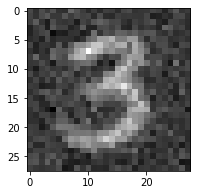

910 done tf.Tensor(1.0568448, shape=(), dtype=float32) tf.Tensor(0.67550224, shape=(), dtype=float32)
920 done tf.Tensor(1.0527371, shape=(), dtype=float32) tf.Tensor(0.6780197, shape=(), dtype=float32)
930 done tf.Tensor(1.0548935, shape=(), dtype=float32) tf.Tensor(0.6773163, shape=(), dtype=float32)
940 done tf.Tensor(1.0621355, shape=(), dtype=float32) tf.Tensor(0.67149925, shape=(), dtype=float32)
950 done tf.Tensor(1.0569369, shape=(), dtype=float32) tf.Tensor(0.67597145, shape=(), dtype=float32)
960 done tf.Tensor(1.0517346, shape=(), dtype=float32) tf.Tensor(0.67844576, shape=(), dtype=float32)
970 done tf.Tensor(1.0543029, shape=(), dtype=float32) tf.Tensor(0.6776402, shape=(), dtype=float32)
980 done tf.Tensor(1.0528337, shape=(), dtype=float32) tf.Tensor(0.6795398, shape=(), dtype=float32)
990 done tf.Tensor(1.0452293, shape=(), dtype=float32) tf.Tensor(0.68131304, shape=(), dtype=float32)


In [10]:
BATCH_SIZE = 64
NOISE_DIM = 100
IMG_SIZE = 28*28
EPOCHS = 1000

G = Generator()
D = Discriminator()

# 
batch_iters=train_images.shape[0]//BATCH_SIZE

# visualizing noise
np.random.seed(7777)
testing_noise = create_noise(1,100)

D_loss_history=[]
G_loss_history=[]
for epoch in range(EPOCHS):
    g_losses = 0
    d_losses = 0
    for batch_iter in range(batch_iters):        
        # D train
        real_img = train_images[batch_iter*BATCH_SIZE:(batch_iter+1)*BATCH_SIZE]
        g_loss, d_loss = train_step(real_img)
        
        g_losses += g_loss
        d_losses += d_loss
        
    # loss history
    D_loss_history.append(d_losses/batch_iters)
    G_loss_history.append(g_losses/batch_iters)
    
    if epoch %10 ==0:
        print(epoch,'done',D_loss_history[-1], G_loss_history[-1])
    # 
    if epoch % 100 ==0:
        t_img = G(testing_noise).numpy().reshape(28,28)
        plt.figure(figsize=(3,3))
        plt.imshow(t_img, cmap='gray')
        plt.show()



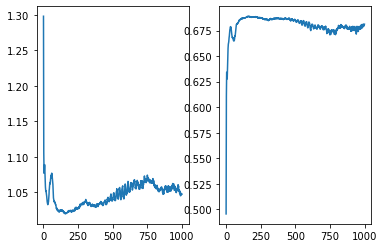

In [11]:
plt.subplot(1,2,1)
plt.plot(D_loss_history)

plt.subplot(1,2,2)
plt.plot(G_loss_history)

plt.show()